In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [12]:
# 📌 Imports
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import pickle

In [13]:
# 📁 Load CSV
df = pd.read_csv("/kaggle/input/student-score-prediction/student_score_dataset.csv")
df.head()

,Gender,Hours_Studied,Previous_Exam_Score,Attendance,Sleep_Hours,Health_Issues,Extra_Curricular_Hours,Student_Score
0,Female,0.5,92.0,68.7,9.3,No,16.8,72.1
1,Male,7.9,41.3,76.8,3.8,Yes,4.0,63.9
2,Male,9.1,60.6,99.5,6.1,Yes,6.0,85.6
3,Female,7.2,67.8,80.8,8.1,Yes,13.9,80.2
4,Female,7.1,71.3,66.4,4.1,No,10.0,75.9


In [14]:
from sklearn.preprocessing import LabelEncoder

# Label Encode categorical columns
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])  # Male=1, Female=0
df["Health_Issues"] = df["Health_Issues"].map({"Yes": 1, "No": 0})

In [15]:
# 🎯 Define Features and Target
X = df.drop("Student_Score", axis=1)
y = df["Student_Score"]

In [16]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
import xgboost as xgb

# ⚙️ Initialize Model
model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

# 🚀 Train the Model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error
)
import numpy as np

# 📊 Predictions
y_pred = model.predict(X_test)

# ✅ Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # as percentage

# 🖨️ Display Metrics
print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Mean Squared Error (MSE): {mse:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")
print(f"📌 Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


📌 Mean Absolute Error (MAE): 1.51
📌 Mean Squared Error (MSE): 2.95
📌 Root Mean Squared Error (RMSE): 1.72
📌 R² Score: 0.9897
📌 Mean Absolute Percentage Error (MAPE): 2.43%


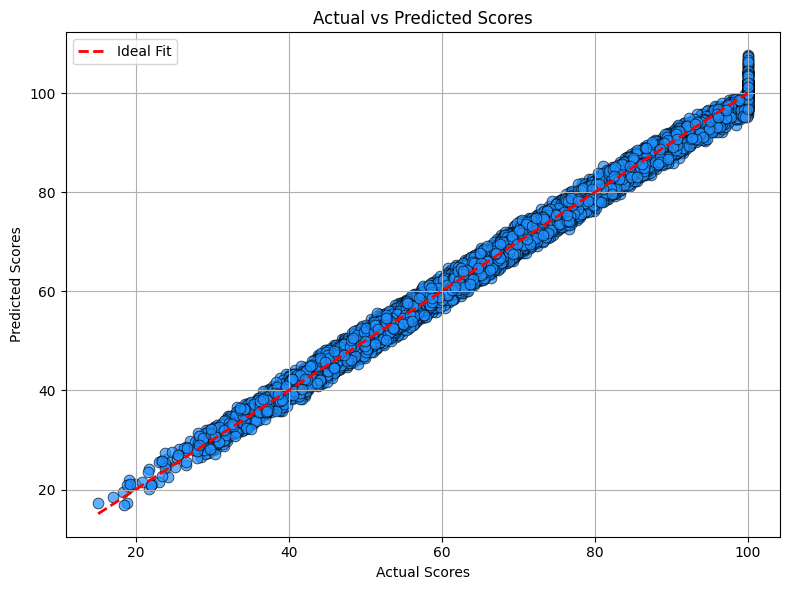

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Predict on test set
y_pred = model.predict(X_test)

# 🖼️ Plotting Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', s=60, edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


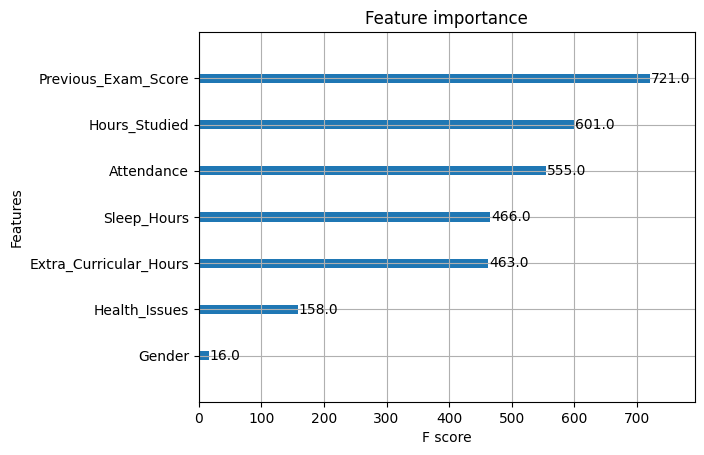

In [20]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

100%|===================| 7973/8000 [00:41<00:00]        

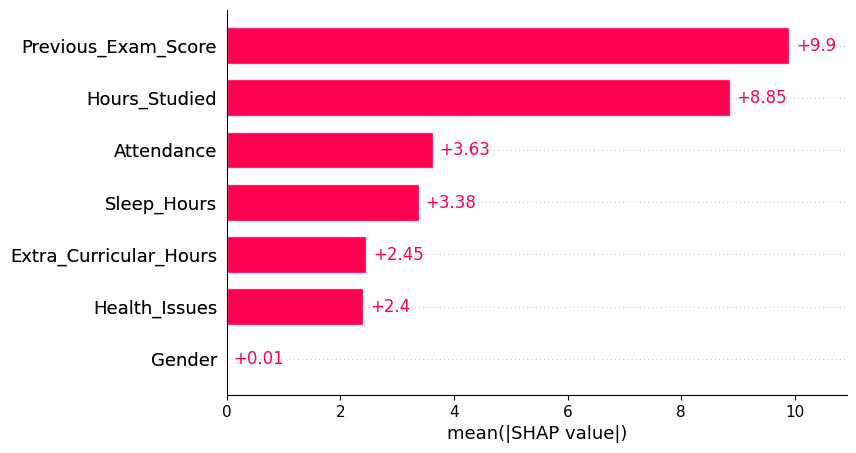

In [21]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 🔍 Visualize
shap.plots.bar(shap_values)

In [22]:
import pickle

# 💾 Save Trained Model
with open("student_score_xgb_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [24]:
print(X_train.columns.tolist())

['Gender', 'Hours_Studied', 'Previous_Exam_Score', 'Attendance', 'Sleep_Hours', 'Health_Issues', 'Extra_Curricular_Hours']
